In [12]:
import warnings
warnings.filterwarnings("ignore")

# Load the dataset

In [13]:
import pandas as pd
iris_df=pd.read_csv("C:\\Users\\geeth\\Downloads\\IRIS (7).csv")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
iris_df.shape

(150, 5)

In [15]:
#To get basic infprmation about dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
#To get the statistical summary of numerical features
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Checking the Null Values

In [17]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Univariate Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

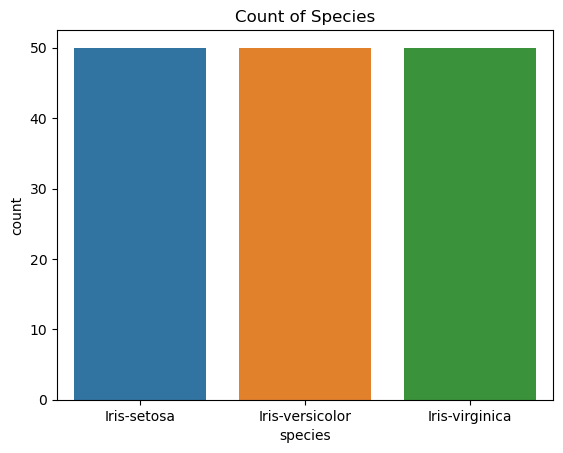

In [19]:
#To get the count of species
sns.countplot(x=iris_df["species"],data=iris_df)
plt.title("Count of Species")
plt.show()

Text(0, 0.5, 'Count')

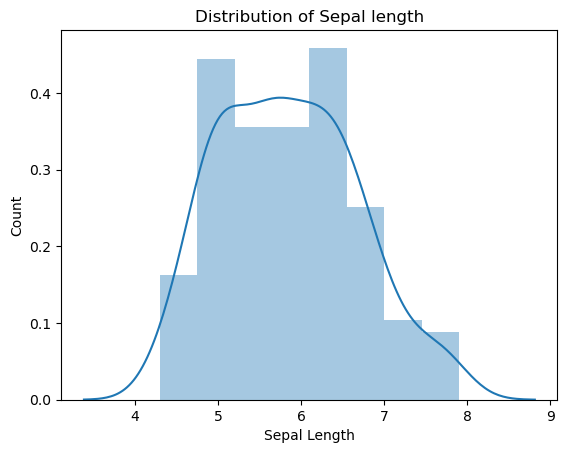

In [20]:
#To see the distribution of Sepal Length
sns.distplot(iris_df["sepal_length"])
plt.title("Distribution of Sepal length")
plt.xlabel("Sepal Length")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

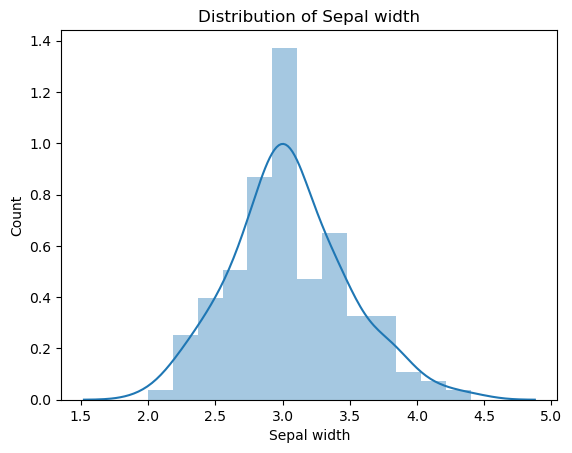

In [21]:
#To see the distribution of Sepal Width
sns.distplot(iris_df["sepal_width"])
plt.title("Distribution of Sepal width")
plt.xlabel("Sepal width")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

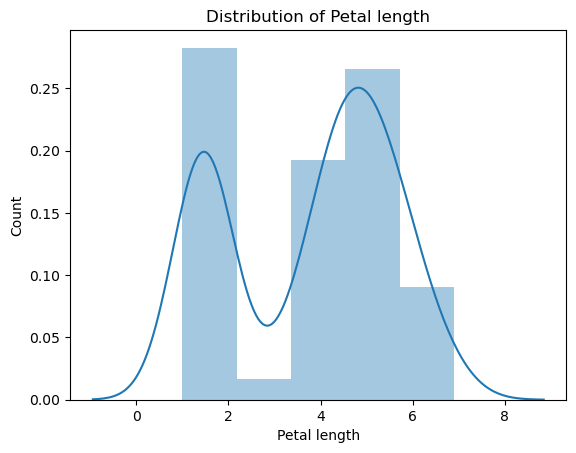

In [22]:
#To see the distribution of Petal Length
sns.distplot(iris_df["petal_length"])
plt.title("Distribution of Petal length")
plt.xlabel("Petal length")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

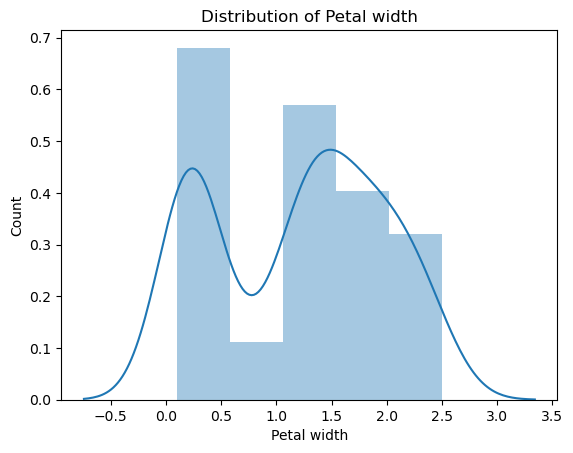

In [23]:
#To see the distribution of Petal Width
sns.distplot(iris_df["petal_width"])
plt.title("Distribution of Petal width")
plt.xlabel("Petal width")
plt.ylabel("Count")

<Axes: xlabel='sepal_length'>

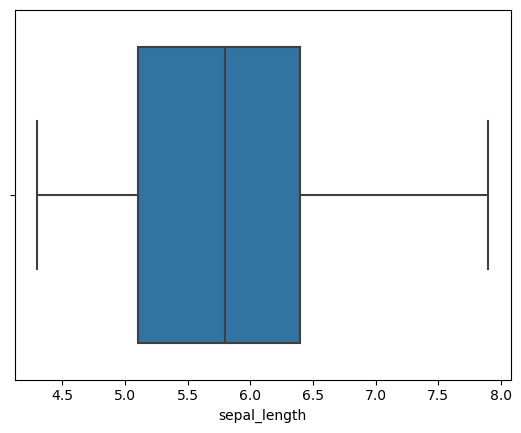

In [24]:
#Boxplot of Sepal Length
sns.boxplot(x="sepal_length",data=iris_df)

<Axes: xlabel='sepal_width'>

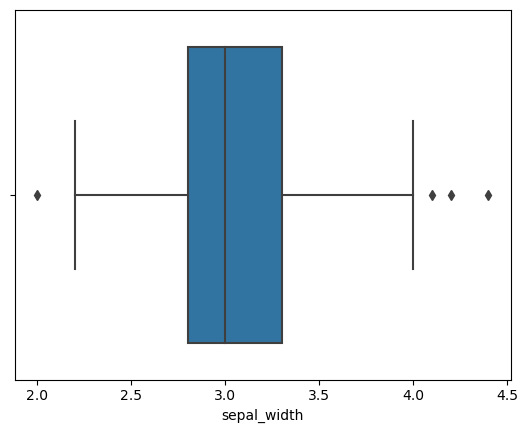

In [25]:
#Boxplot of Sepal Width
sns.boxplot(x="sepal_width",data=iris_df)

<Axes: xlabel='petal_length'>

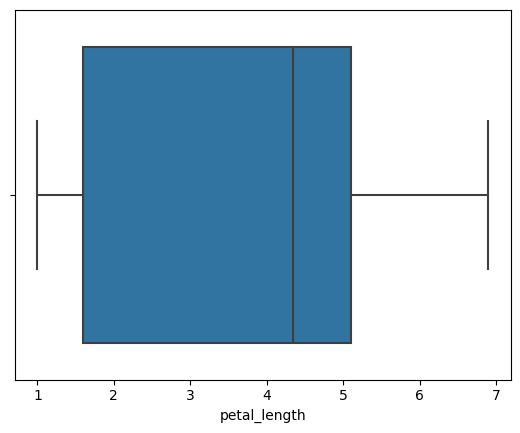

In [26]:
#Boxplot of Petal Length
sns.boxplot(x="petal_length",data=iris_df)

<Axes: xlabel='petal_width'>

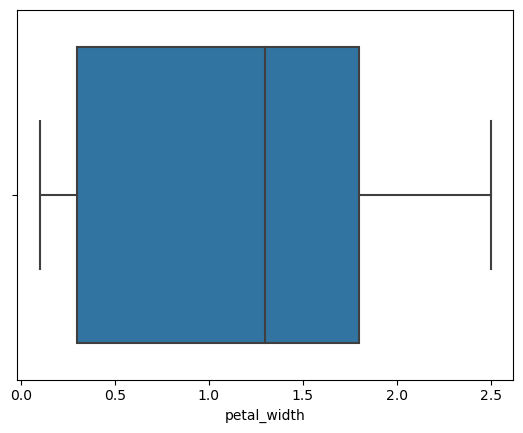

In [27]:
#Boxplot of Petal Width
sns.boxplot(x="petal_width",data=iris_df)

# Bivariate Analysis

<Axes: >

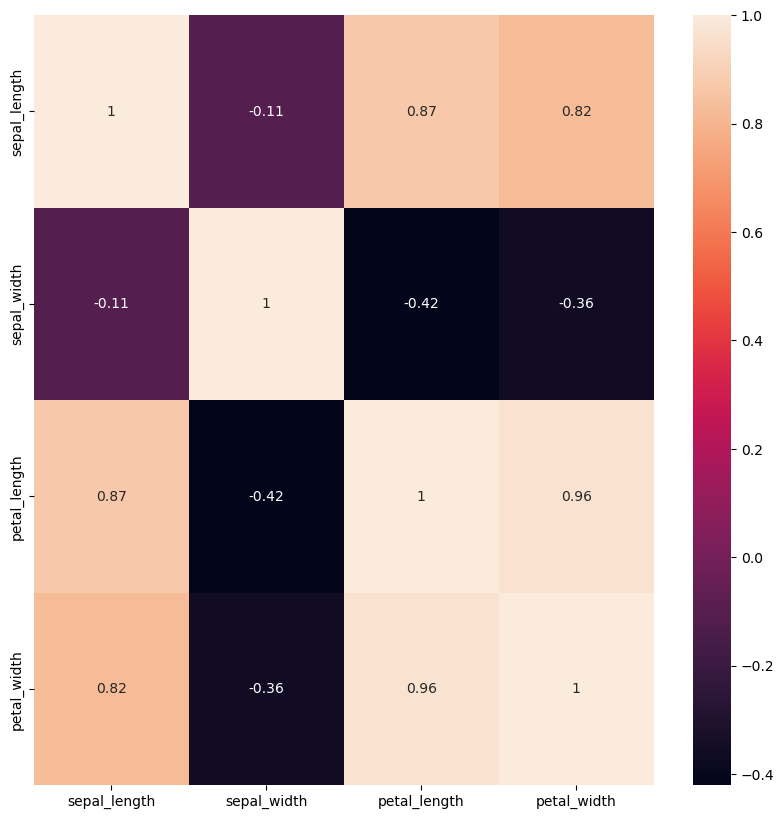

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(iris_df.corr(),annot=True)

From the above heatmap we can conclude as follows
1) Sepal length and Petal length are positively correlated by 87%
2) Sepal length and Petal width are positively correlated by 82%
3) Petal length and Petal width are highly positively correlated by 96%
4) Sepal length and Sepal width are neagtively correlated by 11%
5) Sepal width and Petal length are negatively correlated by 42%
6) Sepal width and Petal width are negatively correlated by 36%

# Data preprocessing

In [30]:
iris_df.quantile([0,0.05,0.50,0.95,0.99,1]).T

,0.00,0.05,0.50,0.95,0.99,1.00
sepal_length,4.3,4.600,5.80,7.255,7.700,7.9
sepal_width,2.0,2.345,3.00,3.800,4.151,4.4
petal_length,1.0,1.300,4.35,6.100,6.700,6.9
petal_width,0.1,0.200,1.30,2.300,2.500,2.5


In [33]:
def outlier_thresholds(iris_df, col_name, q1 = 0.25, q3 = 0.75):
    quartile1 =iris_df[col_name].quantile(q1)
    quartile3 = iris_df[col_name].quantile(q3)
    interquartile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquartile_range
    low_limit = quartile1 - 1.5 * interquartile_range
    return low_limit, up_limit
def check_outliers(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(iris_df, col_name)
    if iris_df[(iris_df[col_name] > up_limit) | (iris_df[col_name] < low_limit)].any(axis = None):
        return True
    else:
        return False

In [34]:
for col in iris_df.select_dtypes(include=[float, int]):
    print(col,":",check_outliers(iris_df, col))

sepal_length : False
sepal_width : True
petal_length : False
petal_width : False


In [39]:
def grab_outliers(iris_df, col_name, index = False):
    low, up = outlier_thresholds(iris_df, col_name)
    if iris_df[((iris_df[col_name] < low) | (iris_df[col_name] > up))].shape[0] > 10:
        print(iris_df[((iris_df[col_name] < low) |(iris_df[col_name] > up))].head())
    else:
        print(iris_df[((iris_df[col_name] < low) | (iris_df[col_name] > up))])
    if index:
        outlier_index = iris_df[((iris_df[col_name] < low) | (iris_df[col_name] > up))].index
        return outlier_index

In [40]:
for col in iris_df.select_dtypes(include=[float, int]):
    col, grab_outliers(iris_df, col)

Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []
    sepal_length  sepal_width  petal_length  petal_width          species
15           5.7          4.4           1.5          0.4      Iris-setosa
32           5.2          4.1           1.5          0.1      Iris-setosa
33           5.5          4.2           1.4          0.2      Iris-setosa
60           5.0          2.0           3.5          1.0  Iris-versicolor
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


In [41]:
def replace_with_thresholds(iris_df, variable):
    low_limit, up_limit = outlier_thresholds(iris_df, variable)
    iris_df.loc[(iris_df[variable] < low_limit), variable] = low_limit
    iris_df.loc[(iris_df[variable] > up_limit), variable] = up_limit

In [42]:
for col in iris_df.select_dtypes(include=[float, int]):
    replace_with_thresholds(iris_df,col)

In [45]:
#Checking outliers 
for col in iris_df.select_dtypes(include=[float, int]):
    print(col,":",check_outliers(iris_df,col))

sepal_length : False
sepal_width : False
petal_length : False
petal_width : False


In [47]:
iris_df.quantile([0,0.05,0.50,0.95,0.99,1]).T

,0.00,0.05,0.50,0.95,0.99,1.00
sepal_length,4.30,4.600,5.80,7.255,7.70,7.90
sepal_width,2.05,2.345,3.00,3.800,4.05,4.05
petal_length,1.00,1.300,4.35,6.100,6.70,6.90
petal_width,0.10,0.200,1.30,2.300,2.50,2.50


# Feature Scaling

In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
iris_df[['petal_length']] = scaler.fit_transform(iris_df[['petal_length']])
iris_df[['petal_width']] = scaler.fit_transform(iris_df[['petal_width']])

# Feature Encoding

In [50]:
iris_df['species'] = iris_df['species'].map({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})

In [51]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,-1.341272,-1.312977,0
1,4.9,3.0,-1.341272,-1.312977,0
2,4.7,3.2,-1.398138,-1.312977,0
3,4.6,3.1,-1.284407,-1.312977,0
4,5.0,3.6,-1.341272,-1.312977,0


In [52]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# Building the model

In [53]:
#Train Test Split
X = iris_df.drop(['species'], axis = 1)
y = iris_df['species']

In [54]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

In [60]:
import matplotlib.pyplot as plt

In [63]:
def predict(ml_model):
    print('model is: {}'.format(ml_model))
    model = ml_model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print("Training Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    train_precision = precision_score(y_train, model.predict(X_train), average="weighted")
    #Testing precision score
    test_precision = precision_score(y_test, model.predict(X_test), average="weighted")
    print("Training Precision Score:", train_precision)
    print("Testing Precision Score:", test_precision)
    predictions=model.predict(X_test)
    print('predictions are: {}'.format(predictions))
    #Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    print('Confusion Matrix:\n', cm)
    print(classification_report(y_test, predictions))

In [64]:
from sklearn.ensemble import RandomForestClassifier
predict(RandomForestClassifier(n_estimators=100, random_state=42))

model is: RandomForestClassifier(random_state=42)
Training Accuracy: 1.0
Test Accuracy: 1.0
Training Precision Score: 1.0
Testing Precision Score: 1.0
predictions are: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

